In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [12]:
x,y = make_regression(n_samples=1000,n_features = 2, noise=2)
y = y.reshape((1000,1))
y = y**2
#donc pour test aussi pour un problem on lineair je peut faire par exenple y = y +abs(y) ect 
# donc je veut choisir y = y**2 just pour avoir un effet polynomial

In [10]:
X = np.hstack((x,np.ones((x.shape[0],1))))
theta= np.random.randn(3,1)

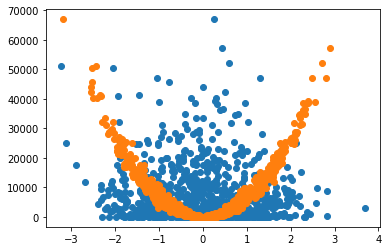

In [13]:
plt.scatter(x[:,0],y) # paraport la premier variable
plt.scatter(x[:,1],y) # paraport la deuxieme variable

In [14]:
def model(X,theta):
    return X.dot(theta)

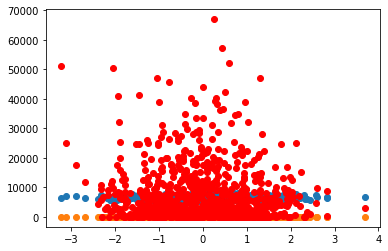

In [15]:
# je veut etuliser ici derectement le theta3 trouver par les equations normales
theta3 = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
plt.scatter(x[:,0],model(X,theta3)) # le bleu
plt.scatter(x[:,0],model(X,theta))
plt.scatter(x[:,0],y,c="r")

In [16]:
def cost_function(X,y,theta):
    m = len(y)
    return 1/(2*m)*(np.sum((model(X,theta)-y)**2))

In [17]:
def grad(X,y,theta):
    m= len(y)
    return 1/m*(X.T.dot(model(X,theta)-y))

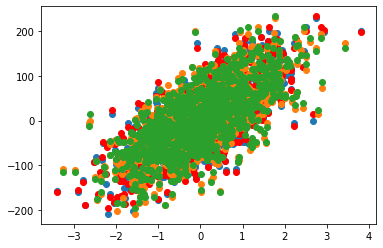

In [9]:
def gradient_descent(X,y,theta,alpha,itterations):
    cost_history = np.zeros(itterations)
    for i in range(itterations):
        cost_history[i] = cost_function(X,y,theta)
        theta = theta - alpha*grad(X,y,theta)
    return theta,cost_history
theta2,cost_history = gradient_descent(X,y,theta,0.005,3000)
# second variable
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],model(X,theta2),c="r")
# first variable
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],model(X,theta2))


0.9805108567907708

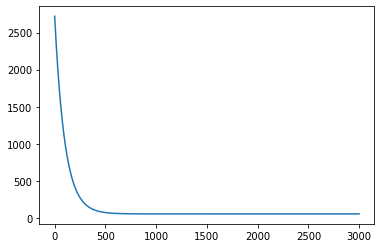

In [10]:
plt.plot(cost_history)
R1 = 1- np.sum((y-model(X,theta))**2)/np.sum((y-y.mean())**2)
R1
# remarquer que pour le theta initiale R2 enverant 0.01541145654
R2 = 1- np.sum((y-model(X,theta2))**2)/np.sum((y-y.mean())**2)
R2
# alors que pour le theta2 calculer d'après le gradient descente R2 enverant 0.978547895452

In [11]:
# 